# Mockup2D benchmark
# improvements iteration based damping (homotopy)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [14]:
dir = "/home/buchwalj/github/ogs/Tests/Data/ThermoRichardsMechanics/Mockup2D"
files = ["out-ref.log","out-d08.log","out-d08dr3.log","out-d08dr4.log","out-d08dr5.log"]
num = len(files)

In [15]:
from ogstools.logparser import (
    fill_ogs_context,
    parse_file,
    analysis_time_step,
    time_step_vs_iterations,
)

records = []
for i in range(num):
    records.append(parse_file(f"{dir}/{files[i]}"))
df_records = [pd.DataFrame(record) for record in records]
df_logs = [fill_ogs_context(record) for record in df_records]
df_ts_it = [time_step_vs_iterations(df_log) for df_log in df_logs]
df_ts = [analysis_time_step(df_log) for df_log in df_logs]


In [16]:
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,num)))

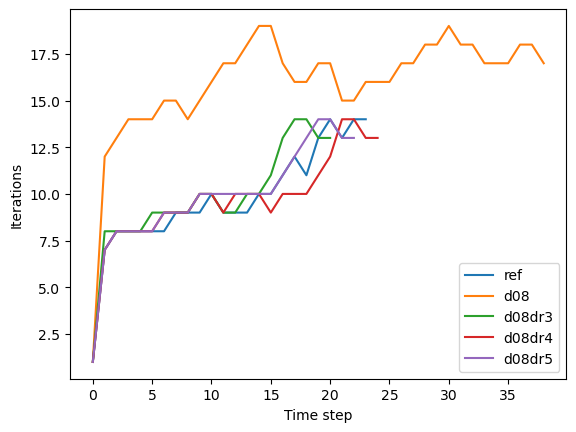

In [17]:
for i, entry in enumerate(df_ts_it):
    plt.plot(entry, label=f"{files[i].split('.')[0].split('-')[1]}")
plt.xlabel("Time step")
plt.ylabel("Iterations")
plt.legend()

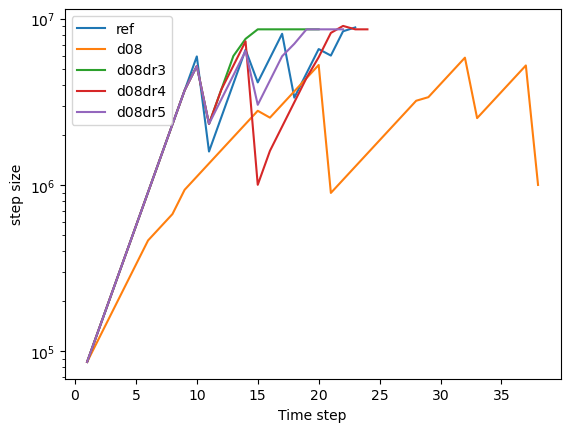

In [18]:
for i, entry in enumerate(df_ts):
    plt.plot(entry.loc[0]["step_size"], label=f"{files[i].split('.')[0].split('-')[1]}")
plt.xlabel("Time step")
plt.ylabel("step size")
plt.yscale("log")
plt.legend()

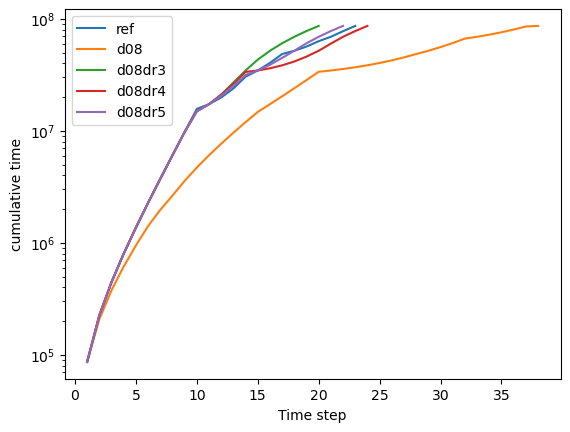

In [19]:
for i, entry in enumerate(df_ts):
    plt.plot(entry.loc[0]["step_size"].cumsum(), label=f"{files[i].split('.')[0].split('-')[1]}")
plt.xlabel("Time step")
plt.ylabel("cumulative time")
plt.yscale("log")
plt.legend()